In [168]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [169]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect(r'/Users/teresa201/Desktop/sqlite/testy.db')

## Question: When is the best and worst time of day to fly?

Time of Day with the most flights that leave early or on time: 6:00AM to 6:59AM

Time Day with the most flights that get delayed: 7:00PM to 7:59PM

Time Day with the most flights that get cancelled: 6:00PM to 6:59PM

Best Time to Fly: 6AM-6:59AM (Highest % of Filghts Early or On Time)

Worst Time to Fly: 6PM - 7:59PM (Highest % of Flights Delayed and Cancelled)


In [170]:
can = pd.read_sql("Select a.dtimeblk, a.TotalFlights, b.EarlyOnTime, ROUND(b.EarlyOnTime * 100.0 / a.TotalFlights, 1)PercentEarlyOnTime from(Select distinct dtimeblk, count(flightnum)TotalFlights from airplanes where cancelled = 0.00 group by dtimeblk order by dtimeblk) as a inner join (Select distinct dtimeblk, count(flightnum)EarlyOnTime from airplanes where cancelled = 0.00 and depdelay <= 0 group by dtimeblk order by dtimeblk) as b on a.dtimeblk = b.dtimeblk order by PercentEarlyOnTime desc;", conn)
print(can)

              dtimeblk  TotalFlights  EarlyOnTime  PercentEarlyOnTime
0     6:00AM to 6:59AM        118809        98199                82.7
1    12:00AM to 5:59AM         44723        36847                82.4
2     7:00AM to 7:59AM        113073        90053                79.6
3     8:00AM to 8:59AM        111210        83285                74.9
4     9:00AM to 9:59AM         96045        68000                70.8
5   10:00AM to 10:59AM         99093        66410                67.0
6   11:00PM to 11:59PM         11423         7582                66.4
7   11:00AM to 11:59AM        105894        69895                66.0
8   12:00PM to 12:59PM        104817        67326                64.2
9   10:00PM to 10:59PM         41893        26742                63.8
10    1:00PM to 1:59PM         94873        58260                61.4
11    2:00PM to 2:59PM         96718        58867                60.9
12    3:00PM to 3:59PM        101287        61242                60.5
13    9:00PM to 9:59

In [171]:
canc = pd.read_sql("Select a.dtimeblk, a.TotalFlights, b.Cancelled, ROUND(b.Cancelled * 100.0 / a.TotalFlights, 1)PercentCancelled from(Select distinct dtimeblk, count(flightnum)TotalFlights from airplanes group by dtimeblk order by dtimeblk) as a inner join (Select distinct dtimeblk, count(flightnum)Cancelled from airplanes where cancelled = 1.00 group by dtimeblk order by dtimeblk) as b on a.dtimeblk = b.dtimeblk order by PercentCancelled desc;", conn)
print(canc)

              dtimeblk  TotalFlights  Cancelled  PercentCancelled
0     6:00PM to 6:59PM         98318       2984               3.0
1     6:00AM to 6:59AM        122278       3469               2.8
2     7:00PM to 7:59PM         93017       2592               2.8
3   10:00PM to 10:59PM         43047       1154               2.7
4    12:00AM to 5:59AM         45969       1246               2.7
5     5:00PM to 5:59PM        112580       3094               2.7
6     8:00PM to 8:59PM         79861       2153               2.7
7     9:00PM to 9:59PM         50169       1364               2.7
8     4:00PM to 4:59PM        100394       2579               2.6
9   12:00PM to 12:59PM        107493       2676               2.5
10    2:00PM to 2:59PM         99247       2529               2.5
11    3:00PM to 3:59PM        103875       2588               2.5
12    1:00PM to 1:59PM         97232       2359               2.4
13    7:00AM to 7:59AM        115882       2809               2.4
14    8:00

## Question: What is the worst day to fly?

Friday leads the other days in delays and Wednesday leads in cancellatons

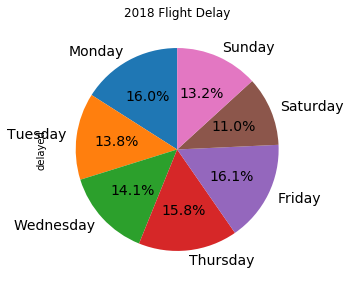

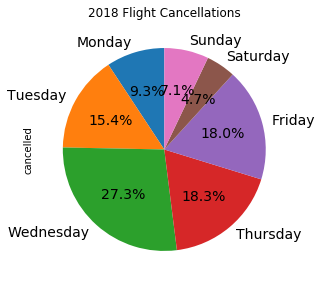

In [173]:
mn = pd.read_sql("Select dayname, Count(dayname) delayed from airplanes where cancelled = 0 and depdelay > 0 group by dayname order by dayofweek", conn)
#print(mn)

plt.figure(figsize=(10,12))
ax2 = plt.subplot(121, aspect='equal')
mn.plot(kind='pie',title ="2018 Flight Delay", y = "delayed", ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=mn['dayname'], legend = False, fontsize=14)
mn = pd.read_sql("Select dayname, Count(dayname) cancelled from airplanes where cancelled = 1 group by dayname order by dayofweek", conn)
#print(mn)
plt.figure(figsize=(10,12))
ax2 = plt.subplot(122, aspect='equal')

mn.plot(kind='pie',title ="2018 Flight Cancellations", y = "cancelled", ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=mn['dayname'], legend = False, fontsize=14)

In [ ]:
## Avg taxi in time for rach airport
##Best time to taxi into DFW?



In [193]:
mn = pd.read_sql("Select airline, avg(taxiin) from airplanes where taxiin > 0  and dest = 'DFW' group by airline;", conn)
print(mn)
mn = pd.read_sql("Select atimeblk, avg(taxiin) from airplanes where dest = 'DFW' and  taxiin > 0 group by atimeblk;", conn)
print(mn)

                       airline  avg(taxiin)
0         Alaska Airlines Inc.     9.063758
1       American Airlines Inc.    11.254686
2         Delta Air Lines Inc.     8.211055
3        Endeavor Air Inc.: 9E     9.547619
4                    Envoy Air    11.487801
5     ExpressJet Airlines Inc.     9.570425
6   Frontier Airlines Inc.: F9     9.918182
7          JetBlue Airways: B6     9.513158
8           Mesa Airlines Inc.    11.175439
9             Republic Airline     9.490971
10       SkyWest Airlines Inc.    11.295347
11            Spirit Air Lines     9.015323
12       United Air Lines Inc.     8.341511
              ATimeBlk  avg(taxiin)
0   10:00AM to 10:59AM    11.914807
1   10:00PM to 10:59PM     8.668274
2   11:00AM to 11:59AM    12.272128
3   11:00PM to 11:59PM     7.714516
4    12:00AM to 5:59AM     7.476038
5   12:00PM to 12:59PM     9.231878
6     1:00PM to 1:59PM     9.962251
7     2:00PM to 2:59PM     9.077861
8     3:00PM to 3:59PM    10.178377
9     4:00PM to 4:59PM  

In [ ]:
##Looking at different speeds per airline/ time of day for same dest and origin city
## SOuthwest seems to have shorter avr airtime..not always..maybe for every set of origin dest 
##Find the ailine with shortest avg airtime if therre are mult airlines

## Routes with the most flights 

In [235]:
mn = pd.read_sql("Select Count(*)NumFlights, origin, dest, count(flightnum) from (Select distinct origin, dest, flightnum from airplanes) group by origin, dest order by count(flightnum) desc;", conn)
print(mn)

      NumFlights origin dest  count(flightnum)  count(airline)
0            230    LAX  LAS               230             230
1            221    LAS  LAX               221             221
2            183    SFO  LAX               183             183
3            179    LAX  SFO               179             179
4            167    DEN  PHX               167             167
5            161    PHX  DEN               161             161
6            151    HOU  DAL               151             151
7            144    LAX  OAK               144             144
8            144    SJC  SAN               144             144
9            142    DAL  HOU               142             142
10           141    LAX  SJC               141             141
11           139    OAK  LAX               139             139
12           137    SJC  LAX               137             137
13           136    BWI  MCO               136             136
14           136    DEN  LAX               136         

## Airline with Fastest Average Airtime for each route

In [291]:
mn = pd.read_sql("Select min(AvgAirTime), origin, dest,airline from (Select origin,dest,airline,avg(airtime)AvgAirTime from (Select  origin, dest, count(distinct airline), airline, airtime from (Select distinct origin, dest, flightnum, airline,airtime from airplanes where airtime > 0) group by origin, dest,airtime having count(distinct airline) > 1  order by count( distinct airline) desc) group by origin,dest,airline)group by origin,dest order by airline;", conn)
print(mn)

      min(AvgAirTime) origin dest                airline
0          327.750000    ANC  ORD   Alaska Airlines Inc.
1          300.000000    DCA  LAX   Alaska Airlines Inc.
2          204.200000    DFW  PDX   Alaska Airlines Inc.
3          325.225806    EWR  PDX   Alaska Airlines Inc.
4          320.580645    EWR  SAN   Alaska Airlines Inc.
5          324.022222    EWR  SEA   Alaska Airlines Inc.
6          338.107143    EWR  SJC   Alaska Airlines Inc.
7          279.266667    HNL  OAK   Alaska Airlines Inc.
8          278.125000    HNL  SAN   Alaska Airlines Inc.
9          289.000000    HNL  SEA   Alaska Airlines Inc.
10         309.787879    IAD  SEA   Alaska Airlines Inc.
11         255.083333    IAH  SEA   Alaska Airlines Inc.
12         123.400000    LAS  SEA   Alaska Airlines Inc.
13         113.600000    LAX  SEA   Alaska Airlines Inc.
14         290.750000    LIH  SEA   Alaska Airlines Inc.
15         298.840000    MCO  SAN   Alaska Airlines Inc.
16         289.000000    MSY  S

## How many airlines fly each route

In [274]:
mn = pd.read_sql("Select  origin, dest, count(distinct airline) from (Select distinct origin, dest, flightnum, airline from airplanes) group by origin, dest having count(distinct airline) > 1  order by count( distinct airline) desc;", conn)
print(mn)

     origin dest  count(distinct airline)
0       MSP  ORD                       10
1       ORD  MSP                       10
2       ATL  ORD                        9
3       ORD  ATL                        9
4       DTW  IAH                        8
5       DTW  ORD                        8
6       IAH  DTW                        8
7       ORD  DTW                        8
8       ATL  IAH                        7
9       DEN  LAX                        7
10      DFW  DTW                        7
11      DFW  IAH                        7
12      DTW  CLT                        7
13      DTW  DFW                        7
14      IAH  ATL                        7
15      IAH  MSP                        7
16      LAS  LAX                        7
17      LAX  DEN                        7
18      LAX  LAS                        7
19      MSP  BOS                        7
20      MSP  IAH                        7
21      MSP  PHL                        7
22      PHL  DTW                  

In [256]:
mn = pd.read_sql("Select airline,airtime,atimeblk from airplanes where origin = 'MSP' and dest = 'ORD' and cancelled = 0;", conn)
print(mn)

                     airline  AirTime          ATimeBlk
0       Delta Air Lines Inc.     55.0  2:00PM to 2:59PM
1       Delta Air Lines Inc.     54.0  7:00PM to 7:59PM
2     American Airlines Inc.     51.0  7:00AM to 7:59AM
3     American Airlines Inc.     51.0  7:00AM to 7:59AM
4     American Airlines Inc.     52.0  7:00AM to 7:59AM
5     American Airlines Inc.     60.0  7:00AM to 7:59AM
6     American Airlines Inc.     51.0  7:00AM to 7:59AM
7     American Airlines Inc.     52.0  7:00AM to 7:59AM
8     American Airlines Inc.     63.0  7:00AM to 7:59AM
9     American Airlines Inc.     54.0  7:00AM to 7:59AM
10    American Airlines Inc.     50.0  7:00AM to 7:59AM
11    American Airlines Inc.     68.0  7:00AM to 7:59AM
12    American Airlines Inc.     54.0  7:00AM to 7:59AM
13    American Airlines Inc.     55.0  7:00AM to 7:59AM
14    American Airlines Inc.     58.0  7:00AM to 7:59AM
15    American Airlines Inc.     60.0  7:00AM to 7:59AM
16    American Airlines Inc.     56.0  7:00AM to

In [207]:
mn = pd.read_sql("Select airline,airtime,atimeblk from airplanes where origin = 'LAX' and dest = 'LAS';", conn)
print(mn)

                     airline AirTime            ATimeBlk
0     Southwest Airlines Co.      43    8:00PM to 8:59PM
1     Southwest Airlines Co.      45    6:00PM to 6:59PM
2     Southwest Airlines Co.      40    1:00PM to 1:59PM
3     Southwest Airlines Co.      48    8:00AM to 8:59AM
4     Southwest Airlines Co.      41    7:00PM to 7:59PM
5     Southwest Airlines Co.      41    9:00PM to 9:59PM
6     Southwest Airlines Co.      46  11:00AM to 11:59AM
7     Southwest Airlines Co.      43  10:00AM to 10:59AM
8       Delta Air Lines Inc.      46    8:00PM to 8:59PM
9       Delta Air Lines Inc.      45    6:00PM to 6:59PM
10      Delta Air Lines Inc.      48  10:00PM to 10:59PM
11      Delta Air Lines Inc.      45  10:00PM to 10:59PM
12      Delta Air Lines Inc.      40    4:00PM to 4:59PM
13      Delta Air Lines Inc.      45    4:00PM to 4:59PM
14      Delta Air Lines Inc.      38    8:00PM to 8:59PM
15      Delta Air Lines Inc.      46  10:00PM to 10:59PM
16    Southwest Airlines Co.   

In [257]:
mn = pd.read_sql("Select airline,avg(airtime),atimeblk from airplanes where origin = 'LAX' and dest = 'LAS' and cancelled = 0 group by airline, atimeblk order by atimeblk, avg(airtime);", conn)
print(mn)

                   airline  avg(airtime)            ATimeBlk
0   Southwest Airlines Co.     43.936508  10:00AM to 10:59AM
1   American Airlines Inc.     44.857143  10:00AM to 10:59AM
2           Virgin America     45.000000  10:00AM to 10:59AM
3    SkyWest Airlines Inc.     45.767857  10:00AM to 10:59AM
4     Delta Air Lines Inc.     46.333333  10:00AM to 10:59AM
5   Southwest Airlines Co.     44.655738  10:00PM to 10:59PM
6     Delta Air Lines Inc.     45.568182  10:00PM to 10:59PM
7   American Airlines Inc.     46.077778  10:00PM to 10:59PM
8    United Air Lines Inc.     42.470588  11:00AM to 11:59AM
9   Southwest Airlines Co.     43.232558  11:00AM to 11:59AM
10   SkyWest Airlines Inc.     47.000000  11:00AM to 11:59AM
11  Southwest Airlines Co.     43.062500  11:00PM to 11:59PM
12    Delta Air Lines Inc.     44.000000  11:00PM to 11:59PM
13  American Airlines Inc.     45.666667  11:00PM to 11:59PM
14  Southwest Airlines Co.     40.900000   12:00AM to 5:59AM
15   United Air Lines In

In [228]:
mn = pd.read_sql("Select min(avgair), atimeblk, airline from (Select airline,avg(airtime)avgair,atimeblk from airplanes where origin = 'LAX' and dest = 'LAS' group by airline, atimeblk order by atimeblk, avg(airtime)) group by atimeblk;", conn)
print(mn)
mn = pd.read_sql("Select max(avgair), atimeblk, airline from (Select airline,avg(airtime)avgair,atimeblk from airplanes where origin = 'LAX' and dest = 'LAS' group by airline, atimeblk order by atimeblk, avg(airtime)) group by atimeblk;", conn)
print(mn)

    min(avgair)            atimeblk                 airline
0     43.936508  10:00AM to 10:59AM  Southwest Airlines Co.
1     44.655738  10:00PM to 10:59PM  Southwest Airlines Co.
2     42.470588  11:00AM to 11:59AM   United Air Lines Inc.
3     43.062500  11:00PM to 11:59PM  Southwest Airlines Co.
4     40.900000   12:00AM to 5:59AM  Southwest Airlines Co.
5     43.260274  12:00PM to 12:59PM  Southwest Airlines Co.
6     42.650000    1:00PM to 1:59PM  Southwest Airlines Co.
7     41.800000    2:00PM to 2:59PM  Southwest Airlines Co.
8     42.666667    3:00PM to 3:59PM  Southwest Airlines Co.
9     43.611111    4:00PM to 4:59PM  Southwest Airlines Co.
10    43.843750    5:00PM to 5:59PM  Southwest Airlines Co.
11    42.000000    6:00AM to 6:59AM  Southwest Airlines Co.
12    43.969697    6:00PM to 6:59PM    Delta Air Lines Inc.
13    44.333333    7:00AM to 7:59AM        Spirit Air Lines
14    42.000000    7:00PM to 7:59PM    Delta Air Lines Inc.
15    43.592105    8:00AM to 8:59AM  Sou

In [272]:
mn = pd.read_sql("Select min(avgair), atimeblk, airline from (Select airline,avg(airtime)avgair,atimeblk from airplanes where origin = 'LAX' and dest = 'LAS' group by airline, atimeblk order by atimeblk, avg(airtime)) group by atimeblk;", conn)
print(mn)
mn = pd.read_sql("Select airline,avg(airtime)avgair from airplanes where origin = 'LAX' and dest = 'LAS' group by airline order by avg(airtime);", conn)
print(mn)

    min(avgair)            atimeblk                 airline
0     43.936508  10:00AM to 10:59AM  Southwest Airlines Co.
1     44.655738  10:00PM to 10:59PM  Southwest Airlines Co.
2     42.470588  11:00AM to 11:59AM   United Air Lines Inc.
3     43.062500  11:00PM to 11:59PM  Southwest Airlines Co.
4     40.900000   12:00AM to 5:59AM  Southwest Airlines Co.
5     43.260274  12:00PM to 12:59PM  Southwest Airlines Co.
6     42.650000    1:00PM to 1:59PM  Southwest Airlines Co.
7     41.800000    2:00PM to 2:59PM  Southwest Airlines Co.
8     42.666667    3:00PM to 3:59PM  Southwest Airlines Co.
9     43.611111    4:00PM to 4:59PM  Southwest Airlines Co.
10    43.843750    5:00PM to 5:59PM  Southwest Airlines Co.
11    42.000000    6:00AM to 6:59AM  Southwest Airlines Co.
12    43.969697    6:00PM to 6:59PM    Delta Air Lines Inc.
13    44.333333    7:00AM to 7:59AM        Spirit Air Lines
14    42.000000    7:00PM to 7:59PM    Delta Air Lines Inc.
15    43.592105    8:00AM to 8:59AM  Sou

In [265]:
mn = pd.read_sql("Select count(*), airline from (Select min(avgair), atimeblk airline from (Select airline,avg(airtime)avgair,atimeblk from airplanes where origin = 'MSP' and dest = 'ORD' group by airline, atimeblk order by atimeblk, avg(airtime)) group by atimeblk) group by airline;", conn)
print(mn)
print("------------")
mn = pd.read_sql("Select count(*), airline from (Select min(avgair), atimeblk, airline from (Select airline,avg(airtime)avgair,atimeblk from airplanes where origin = 'ORD' and dest = 'MSP' group by airline, atimeblk order by atimeblk, avg(airtime)) group by atimeblk) group by airline;", conn)
print(mn)
print("------------")
mn = pd.read_sql("Select count(*), airline from (Select min(avgair), atimeblk, airline from (Select airline,avg(airtime)avgair,atimeblk from airplanes where origin = 'ATL' and dest = 'ORD' group by airline, atimeblk order by atimeblk, avg(airtime)) group by atimeblk) group by airline;", conn)
print(mn)
print("------------")
mn = pd.read_sql("Select count(*), airline from (Select min(avgair), atimeblk, airline from (Select airline,avg(airtime)avgair,atimeblk from airplanes where origin = 'ORD' and dest = 'ATL' group by airline, atimeblk order by atimeblk, avg(airtime)) group by atimeblk) group by airline;", conn)
print(mn)

   count(*)                 airline
0         5  American Airlines Inc.
1         2    Delta Air Lines Inc.
2         1   Endeavor Air Inc.: 9E
3         1               Envoy Air
4         1       PSA Airlines Inc.
5         1        Republic Airline
6         2   SkyWest Airlines Inc.
7         2        Spirit Air Lines
8         3   United Air Lines Inc.
------------
   count(*)                   airline
0         7    American Airlines Inc.
1         1      Delta Air Lines Inc.
2         2     Endeavor Air Inc.: 9E
3         1                 Envoy Air
4         1  ExpressJet Airlines Inc.
5         1          Republic Airline
6         3     SkyWest Airlines Inc.
7         2     United Air Lines Inc.
------------
   count(*)                 airline
0         3  American Airlines Inc.
1         6    Delta Air Lines Inc.
2         3   Endeavor Air Inc.: 9E
3         2               Envoy Air
4         1        Republic Airline
5         2   SkyWest Airlines Inc.
6         1        S

     dayname  TotalFlights  Cancelled  PercentCancelled
0  Wednesday        251573      11860               4.7
1   Thursday        258637       7930               3.1
2     Friday        260031       7814               3.0
3    Tuesday        248792       6691               2.7
4     Monday        255584       4032               1.6
5     Sunday        221691       3075               1.4
6   Saturday        206562       2037               1.0


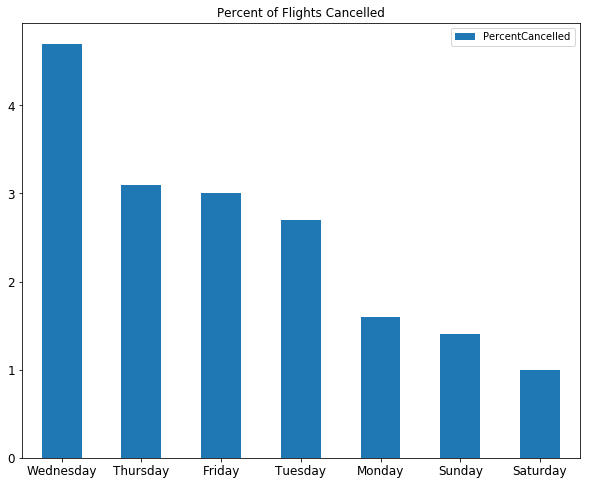

In [174]:
canc = pd.read_sql("Select a.dayname, a.TotalFlights, b.Cancelled, ROUND(b.Cancelled * 100.0 / a.TotalFlights, 1)PercentCancelled from(Select distinct dayname, count(flightnum)TotalFlights from airplanes group by dayname order by dayname) as a inner join (Select distinct dayname, count(flightnum)Cancelled from airplanes where cancelled = 1.00 group by dayname order by dayname) as b on a.dayname = b.dayname order by PercentCancelled desc;", conn)
print(canc)
ax1 = canc[['dayname','PercentCancelled']].plot(kind='bar', title ="Percent of Flights Cancelled", figsize=(10, 8), legend=True, fontsize=12)
ax1.set_xticklabels(canc['dayname'], rotation=0)


In [175]:
can = pd.read_sql("Select a.dtimeblk, a.TotalFlights, b.Early, ROUND(b.Early * 100.0 / a.TotalFlights, 1)PercentEarly  from(Select distinct dtimeblk, count(flightnum)TotalFlights from airplanes where cancelled = 0.00 group by dtimeblk order by dtimeblk) as a inner join (Select distinct dtimeblk, count(flightnum)Early from airplanes where cancelled = 0.00 and depdelay < 0 group by dtimeblk order by dtimeblk) as b on a.dtimeblk = b.dtimeblk order by PercentEarly desc;", conn)
print(can)

              dtimeblk  TotalFlights  Early  PercentEarly
0     6:00AM to 6:59AM        118809  91695          77.2
1    12:00AM to 5:59AM         44723  34297          76.7
2     7:00AM to 7:59AM        113073  83843          74.1
3     8:00AM to 8:59AM        111210  77258          69.5
4     9:00AM to 9:59AM         96045  62922          65.5
5   11:00PM to 11:59PM         11423   7054          61.8
6   10:00AM to 10:59AM         99093  61132          61.7
7   11:00AM to 11:59AM        105894  64466          60.9
8   10:00PM to 10:59PM         41893  24971          59.6
9   12:00PM to 12:59PM        104817  62288          59.4
10    1:00PM to 1:59PM         94873  53492          56.4
11    9:00PM to 9:59PM         48805  27382          56.1
12    2:00PM to 2:59PM         96718  54158          56.0
13    3:00PM to 3:59PM        101287  56463          55.7
14    8:00PM to 8:59PM         77708  43223          55.6
15    4:00PM to 4:59PM         97815  53782          55.0
16    5:00PM t

In [176]:
can = pd.read_sql("Select a.dtimeblk, a.TotalFlights, b.Delay, ROUND(b.Delay * 100.0 / a.TotalFlights, 1)PercentDelay  from(Select distinct dtimeblk, count(flightnum)TotalFlights from airplanes where cancelled = 0.00 group by dtimeblk order by dtimeblk) as a inner join (Select distinct dtimeblk, count(flightnum)Delay from airplanes where cancelled = 0.00 and depdelay > 0 group by dtimeblk order by dtimeblk) as b on a.dtimeblk = b.dtimeblk order by PercentDelay desc;", conn)
print(can)

              dtimeblk  TotalFlights  Delay  PercentDelay
0     7:00PM to 7:59PM         90425  37706          41.7
1     6:00PM to 6:59PM         95334  39613          41.6
2     5:00PM to 5:59PM        109486  44863          41.0
3     4:00PM to 4:59PM         97815  39507          40.4
4     8:00PM to 8:59PM         77708  31226          40.2
5     9:00PM to 9:59PM         48805  19394          39.7
6     3:00PM to 3:59PM        101287  40045          39.5
7     2:00PM to 2:59PM         96718  37851          39.1
8     1:00PM to 1:59PM         94873  36613          38.6
9   10:00PM to 10:59PM         41893  15151          36.2
10  12:00PM to 12:59PM        104817  37491          35.8
11  11:00AM to 11:59AM        105894  35999          34.0
12  11:00PM to 11:59PM         11423   3841          33.6
13  10:00AM to 10:59AM         99093  32683          33.0
14    9:00AM to 9:59AM         96045  28045          29.2
15    8:00AM to 8:59AM        111210  27925          25.1
16    7:00AM t

In [177]:
can = pd.read_sql("Select a.dtimeblk, a.TotalFlights, b.OnTime, ROUND(b.OnTime * 100.0 / a.TotalFlights, 1)PercentOnTime  from(Select distinct dtimeblk, count(flightnum)TotalFlights from airplanes where cancelled = 0.00 group by dtimeblk order by dtimeblk) as a inner join (Select distinct dtimeblk, count(flightnum)OnTime from airplanes where cancelled = 0.00 and depdelay = 0 group by dtimeblk order by dtimeblk) as b on a.dtimeblk = b.dtimeblk order by PercentOnTime desc;", conn)
print(can)

              dtimeblk  TotalFlights  OnTime  PercentOnTime
0    12:00AM to 5:59AM         44723    2550            5.7
1     6:00AM to 6:59AM        118809    6504            5.5
2     7:00AM to 7:59AM        113073    6210            5.5
3     8:00AM to 8:59AM        111210    6027            5.4
4   10:00AM to 10:59AM         99093    5278            5.3
5     9:00AM to 9:59AM         96045    5078            5.3
6   11:00AM to 11:59AM        105894    5429            5.1
7     1:00PM to 1:59PM         94873    4768            5.0
8     2:00PM to 2:59PM         96718    4709            4.9
9   12:00PM to 12:59PM        104817    5038            4.8
10    3:00PM to 3:59PM        101287    4779            4.7
11  11:00PM to 11:59PM         11423     528            4.6
12    4:00PM to 4:59PM         97815    4526            4.6
13    7:00PM to 7:59PM         90425    3965            4.4
14    5:00PM to 5:59PM        109486    4709            4.3
15  10:00PM to 10:59PM         41893    

In [178]:
can = pd.read_sql("SELECT CAST(1 AS DECIMAL) / 2;", conn)
print(can)

   CAST(1 AS DECIMAL) / 2
0                       0


In [179]:
can = pd.read_sql("Select distinct dtimeblk, count(flightnum)TotalFlights, count(depdelay) from airplanes where cancelled = 0.00 group by dtimeblk order by dtimeblk;", conn)
print(can)


              DTimeBlk  TotalFlights  count(depdelay)
0   10:00AM to 10:59AM         99093            99093
1   10:00PM to 10:59PM         41893            41893
2   11:00AM to 11:59AM        105894           105894
3   11:00PM to 11:59PM         11423            11423
4    12:00AM to 5:59AM         44723            44723
5   12:00PM to 12:59PM        104817           104817
6     1:00PM to 1:59PM         94873            94873
7     2:00PM to 2:59PM         96718            96718
8     3:00PM to 3:59PM        101287           101287
9     4:00PM to 4:59PM         97815            97815
10    5:00PM to 5:59PM        109486           109486
11    6:00AM to 6:59AM        118809           118809
12    6:00PM to 6:59PM         95334            95334
13    7:00AM to 7:59AM        113073           113073
14    7:00PM to 7:59PM         90425            90425
15    8:00AM to 8:59AM        111210           111210
16    8:00PM to 8:59PM         77708            77708
17    9:00AM to 9:59AM      

In [180]:
can = pd.read_sql("Select distinct dtimeblk, count(flightnum)EarlyOnTime from airplanes where cancelled = 0.00 and depdelay <= 0 group by dtimeblk order by dtimeblk;", conn)
print(can)

              DTimeBlk  EarlyOnTime
0   10:00AM to 10:59AM        66410
1   10:00PM to 10:59PM        26742
2   11:00AM to 11:59AM        69895
3   11:00PM to 11:59PM         7582
4    12:00AM to 5:59AM        36847
5   12:00PM to 12:59PM        67326
6     1:00PM to 1:59PM        58260
7     2:00PM to 2:59PM        58867
8     3:00PM to 3:59PM        61242
9     4:00PM to 4:59PM        58308
10    5:00PM to 5:59PM        64623
11    6:00AM to 6:59AM        98199
12    6:00PM to 6:59PM        55721
13    7:00AM to 7:59AM        90053
14    7:00PM to 7:59PM        52719
15    8:00AM to 8:59AM        83285
16    8:00PM to 8:59PM        46482
17    9:00AM to 9:59AM        68000
18    9:00PM to 9:59PM        29411
